# Applying Classical Supervised Classsification Algorithms to IRIS Dataset

## 1. Import libraries

Import all of the modules, functions, and objects we will use in this tutorial.

In [21]:
import sys
import scipy
import numpy as np
import matplotlib
import pandas as pd
import sklearn
import seaborn as sns
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

## 2. Load the Dataset

We will be using the iris flowers dataset, which contains 150 observations of iris flowers. There are four columns of measurements and the species of flower observed.  Only three species are present in this dataset.

The data can be loaded directly from the UCI Machine Learning Repository

In [3]:
#Dataset Loading
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
dataset = pd.read_csv(url, names=names)

## 2.1 Dataset Properties

Lets take a look at the dataset by observing its dimensions, the first few rows of data, a statistical summary of the attributes, and a breakdown of the data by the class variable.

In [4]:
# Shape
print(dataset.shape)

(150, 5)


In [6]:
# Head
print(dataset.head(10))

   sepal-length  sepal-width  petal-length  petal-width        class
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa
5           5.4          3.9           1.7          0.4  Iris-setosa
6           4.6          3.4           1.4          0.3  Iris-setosa
7           5.0          3.4           1.5          0.2  Iris-setosa
8           4.4          2.9           1.4          0.2  Iris-setosa
9           4.9          3.1           1.5          0.1  Iris-setosa


In [7]:
# descriptions
print(dataset.describe())

       sepal-length  sepal-width  petal-length  petal-width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


In [8]:
# class distribution
print(dataset.groupby('class').size())

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


## 2.2 Data Visualizations

Lets visualize the data so we can understand the distribution of the input attributes. We will use histograms of each attribute, as well as some multivariate plots so that we can view the interactions between variables.

<Figure size 432x288 with 0 Axes>

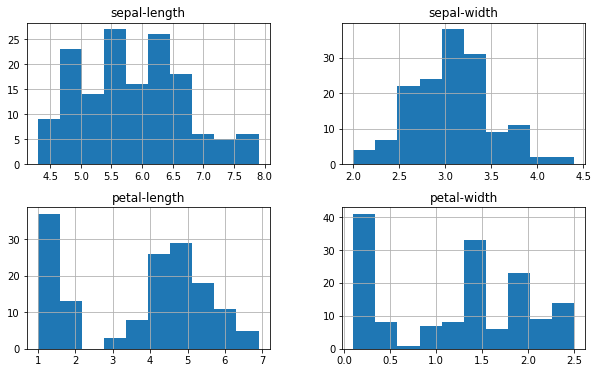

In [18]:
# histograms
plt.figure()
dataset.hist(figsize=(10,6))
plt.show()

In [11]:
import seaborn as sns

<Figure size 432x288 with 0 Axes>

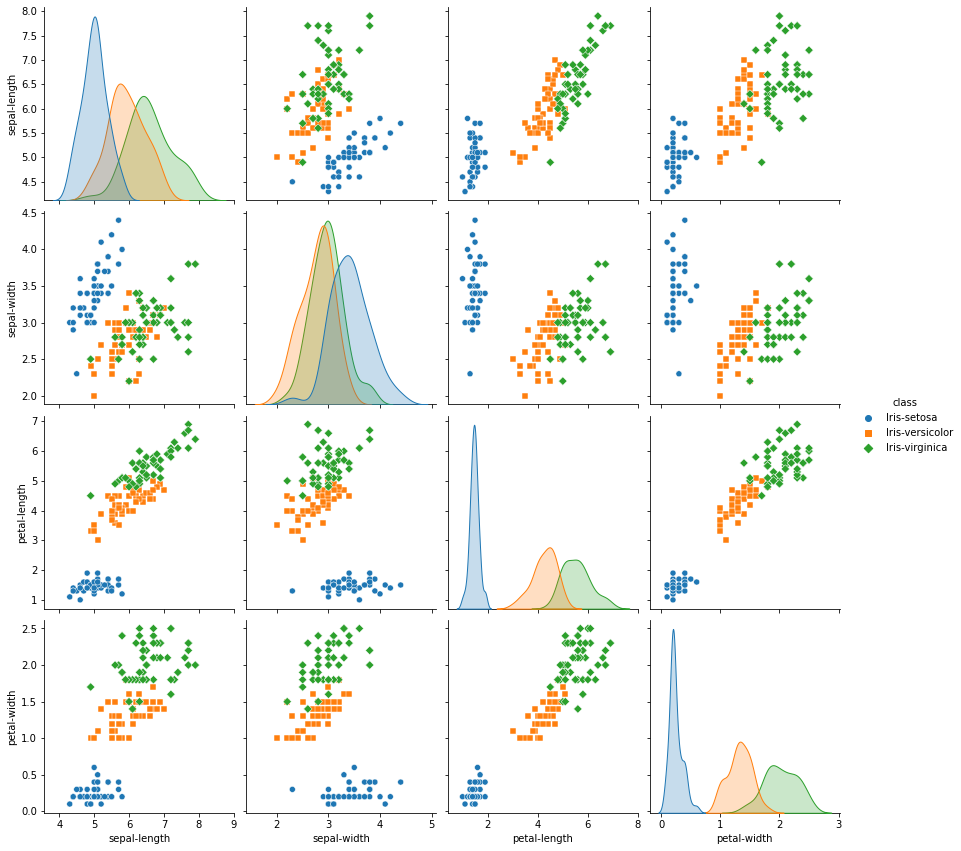

In [14]:
plt.figure()
sns.pairplot(dataset,hue="class",height=3,markers=["o","s","D"])
plt.show()

<Figure size 432x288 with 0 Axes>

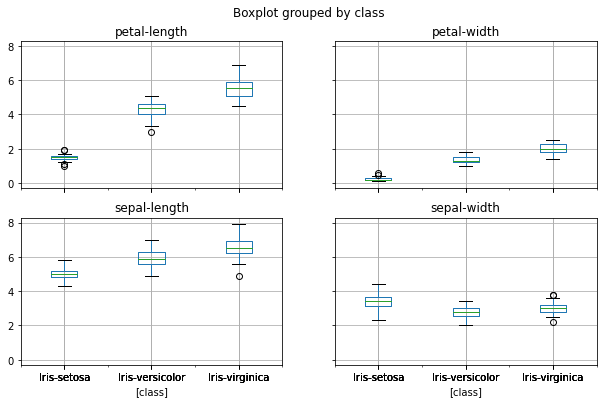

In [13]:
plt.figure()
dataset.boxplot(by="class",figsize=(10,6))
plt.show()

## 3. Evaluate Algorithms

Lets create some models of the data and estimate their accuracy on unseen data.

We are going to,

* Create a validation dataset
* Set-up cross validation
* Build three different models to predict species from flower measurement
* Select the best model

## 3.1 Create Validation Dataset

Lets split the loaded dataset into two.  80% of the data will be used for training, while 20% will be used for validation.

In [19]:
# Split-out validation dataset
array = dataset.values
X = array[:,0:4]
Y = array[:,4]
validation_size = 0.20
seed = 42
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size = validation_size, random_state = seed)

In [20]:
# Test options and evaluation metric
seed = 42
scoring = 'accuracy'

## 3.2 Build Models

Lets evaluate three models:

* Logistic Regression (LR)
* K-Nearest Neighbors (KNN)
* Support Vector Machine (SVM)

In [31]:
models = []
models.append(('LR', LogisticRegression(max_iter=500)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('SVM', SVC()))

# evaluate each model in turn
results = []
names = []

for name, model in models:
    kfold = model_selection.KFold(n_splits=10)
    cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.966667 (0.055277)
KNN: 0.950000 (0.055277)
SVM: 0.958333 (0.041667)


## 4. Make Predictions

Lets test the model on the validation set to make sure that our algorithms can generalize to new data.  Otherwise, we may be overfitting the training data.  

In [32]:
# Make predictions on validation dataset

for name, model in models:
    model.fit(X_train, Y_train)
    predictions = model.predict(X_validation)
    print(name)
    print(accuracy_score(Y_validation, predictions))
    print(classification_report(Y_validation, predictions))

LR
1.0
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30

KNN
1.0
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30

SVM
1.0
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 

### We can clearly see the accuracy of the models and the confusion matrix for each model. All the models are able to perfectly classify all the samples in the validaation dataset.